# 積上げ密度プロット

## 概要

**積上げ密度プロット（Stacked Density Plot）** は，主に **連続的に変化する** 質的変数に対して， **面積** で比率の変化を表現するグラフです．
横軸に連続的に変化する変数（例えば日付），縦軸に質的変数の比率を取ります．
[円グラフ]()や[積上げ棒グラフ]()と同様に，比率同士の比較が難しいという欠点があります．
また，あくまでも **比率** の推移であり， **絶対量** の推移ではないことにも注意が必要です．

![](../figs/charts/area.png)

例えば上図は雑誌別の合計作品数のシェアの推移を表したものです．
縦軸の上下端を基準として`週刊少年サンデー`・`週刊少年マガジン`のシェアの推移はなんとなくわかりますが，`週刊少年ジャンプ`・`週刊少年チャンピオン`の推移はわかりません．

## Plotlyによる作図方法

Plotlyにおいては，`plotly.express.area()`で積上げ密度プロットを作成可能です．

```python
import plotly.express as px
fig = px.area(
    df, x='col_x', y='col_y')
```

上記の例では，`df`の`col_x`列を横軸，`col_y`列を縦軸に取った積上げ密度プロットのオブジェクト`fig`を作成します．
ただし，`col_y`列は事前に合計値が1となるよう調整しておく必要があることにご注意ください．

## MADB Labを用いた作図例

### 下準備

In [1]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 前処理の結果，以下に分析対象ファイルが格納されていることを想定
PATH_DATA = '../../data/preprocess/out/episodes.csv'
# Jupyter Book用のPlotlyのrenderer
RENDERER = 'plotly_mimetype+notebook'

In [3]:
def show_fig(fig):
    """Jupyter Bookでも表示可能なようRendererを指定"""
    fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
    fig.show(renderer=RENDERER)

In [4]:
def add_years_to_df(df, unit_years=10):
    """unit_years単位で区切ったyears列を追加"""
    df_new = df.copy()
    df_new['years'] = \
        pd.to_datetime(df['datePublished']).dt.year \
        // unit_years * unit_years
    df_new['years'] = df_new['years'].astype(str)
    return df_new

In [5]:
df = pd.read_csv(PATH_DATA)

### 雑誌別・年代別の合計作品数

In [6]:
col_count = 'cname'

In [7]:
# 1年単位で区切ったyearsを追加
df = add_years_to_df(df, 1)
# mcname, yearsで集計
df_plot = \
    df.groupby(['mcname', 'years'])[col_count].\
    nunique().reset_index()
# years単位で集計してdf_plotにカラムを追加
df_tmp = df_plot.groupby('years')[col_count].sum().reset_index(
    name='years_total')
df_plot = pd.merge(df_plot, df_tmp, how='left', on='years')
# years合計あたりの比率を計算
df_plot['ratio'] = df_plot[col_count] / df_plot['years_total']

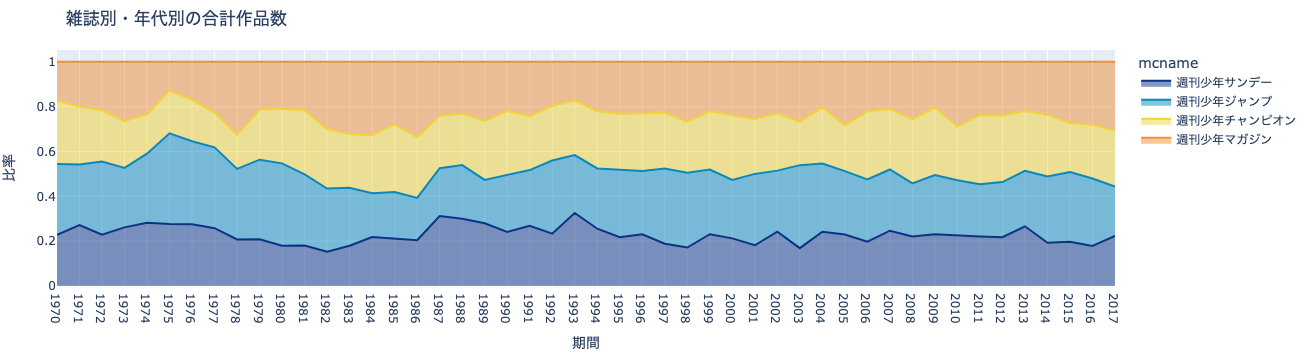

In [8]:
fig = px.area(
    df_plot, x='years', y='ratio', color='mcname',
    color_discrete_sequence= px.colors.diverging.Portland,
    title='雑誌別・年代別の合計作品数')
fig.update_xaxes(title='期間')
fig.update_yaxes(title='比率')
show_fig(fig)

### 雑誌別・年代別の合計作者数

In [9]:
col_count = 'creator'

In [10]:
# 10年単位で区切ったyearsを追加
df = add_years_to_df(df, 1)
# mcname, yearsで集計
df_plot = \
    df.groupby(['mcname', 'years'])[col_count].\
    nunique().reset_index()
# years単位で集計してdf_plotにカラムを追加
df_tmp = df_plot.groupby('years')[col_count].sum().reset_index(
    name='years_total')
df_plot = pd.merge(df_plot, df_tmp, how='left', on='years')
# years合計あたりの比率を計算
df_plot['ratio'] = df_plot[col_count] / df_plot['years_total']

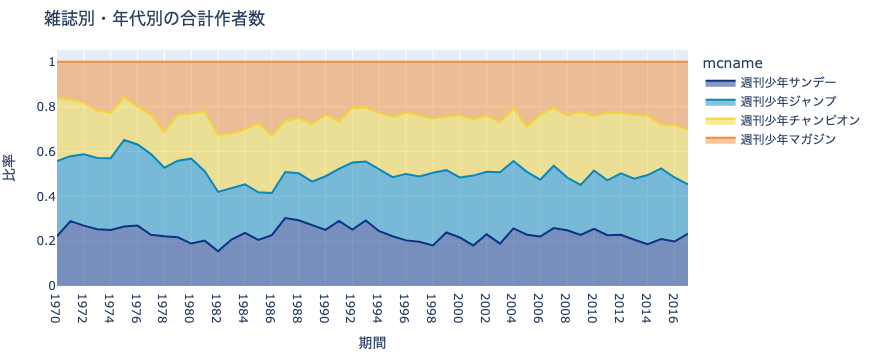

In [11]:
fig = px.area(
    df_plot, x='years', y='ratio', color='mcname',
    color_discrete_sequence= px.colors.diverging.Portland,
    title='雑誌別・年代別の合計作者数')
fig.update_xaxes(title='期間')
fig.update_yaxes(title='比率')
show_fig(fig)